In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

## 1. 导入 A01T.gdf 数据, 查看文件信息

In [2]:
raw = mne.io.read_raw_gdf("A01T.gdf", preload=True)

Extracting EDF parameters from D:\User\mrrai\project\MNEpython\dataprep\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


D:\User\mrrai\.conda\envs\MNEenv\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


In [3]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


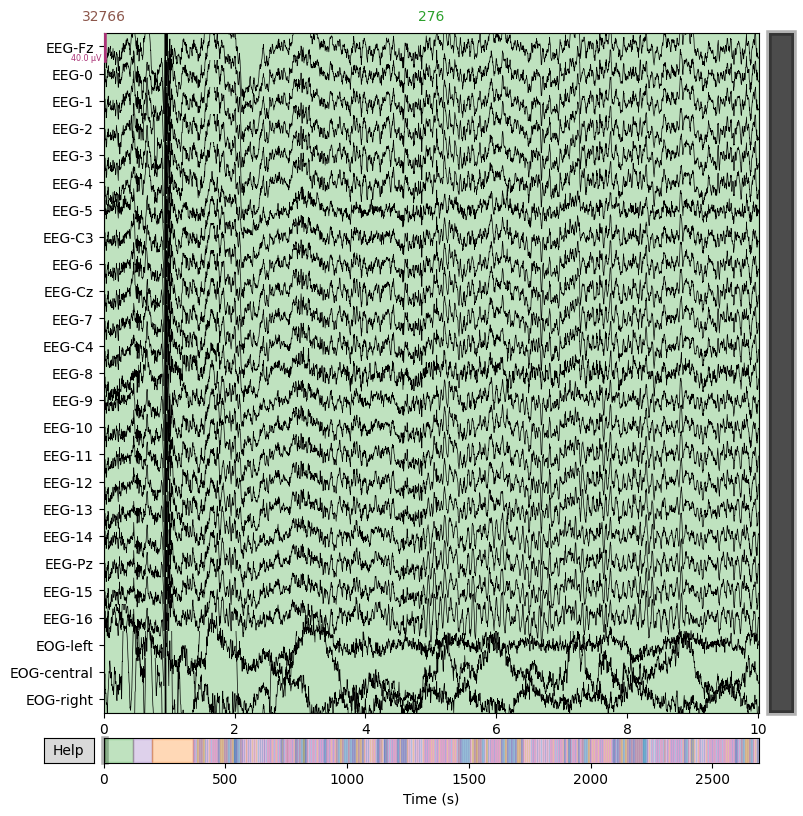

In [5]:
raw.plot(n_channels=25)
plt.show()

## 2. 重采样、滤波

In [6]:
raw.resample(128)
raw.filter(1, 32)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 423 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


<RawGDF | A01T.gdf, 25 x 344334 (2690.1 s), ~65.7 MB, data loaded>

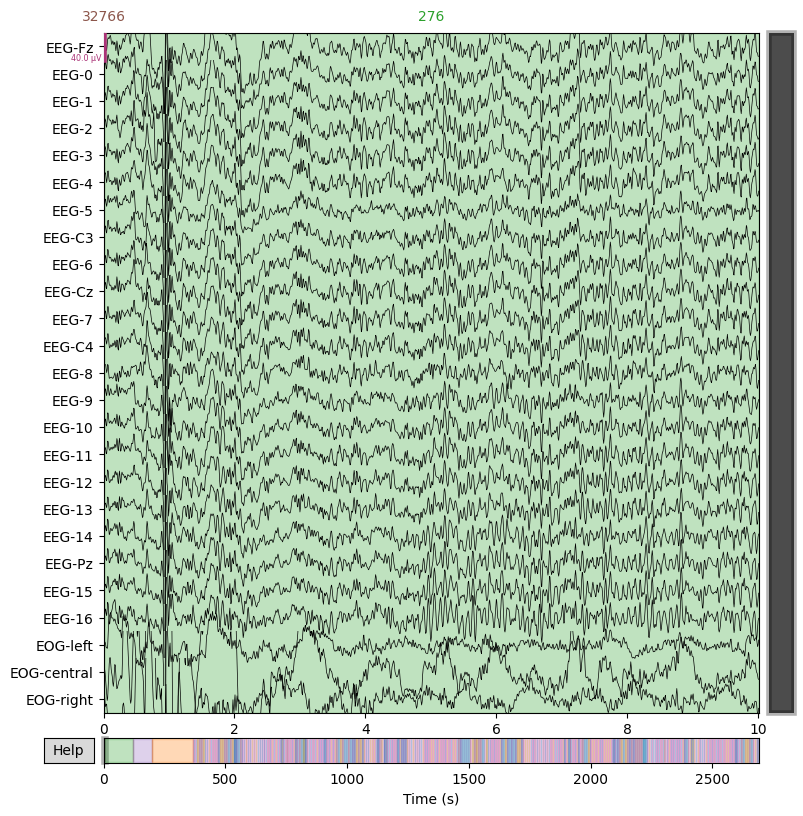

In [8]:
raw.plot(n_channels=25)
plt.show()

## 去除无用通道

In [22]:
raw.drop_channels(["EOG-left", "EOG-central", "EOG-right"])

<RawGDF | A01T.gdf, 22 x 344334 (2690.1 s), ~57.8 MB, data loaded>

## 设置电极信息

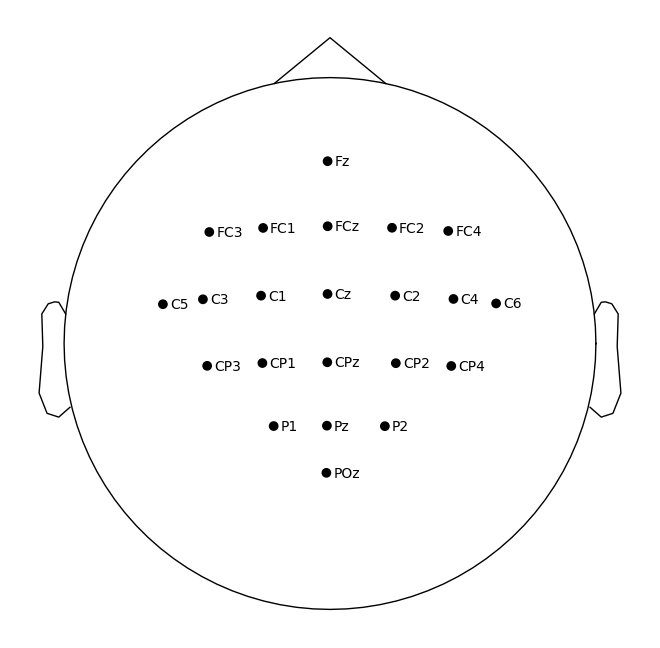

In [87]:
ch_names=['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 
          'FC4', 'C5', 'C3', 'C1', 'Cz', 
          'C2', 'C4', 'C6', 'CP3', 'CP1',
          'CPz', 'CP2', 'CP4', 'P1', 'Pz', 
          'P2', 'POz']
raw.rename_channels(dict(zip(raw.info["ch_names"], ch_names)))
raw.set_montage('standard_1020')
raw.plot_sensors(show_names=True)
plt.show()

In [54]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw.copy().filter(8, None))

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Filter length: 213 samples (1.664 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 22 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 7.4s.


<ICA | raw data decomposition, method: fastica (fit in 35 iterations on 344334 samples), 20 ICA components (22 PCA components available), channel types: eeg, no sources marked for exclusion>

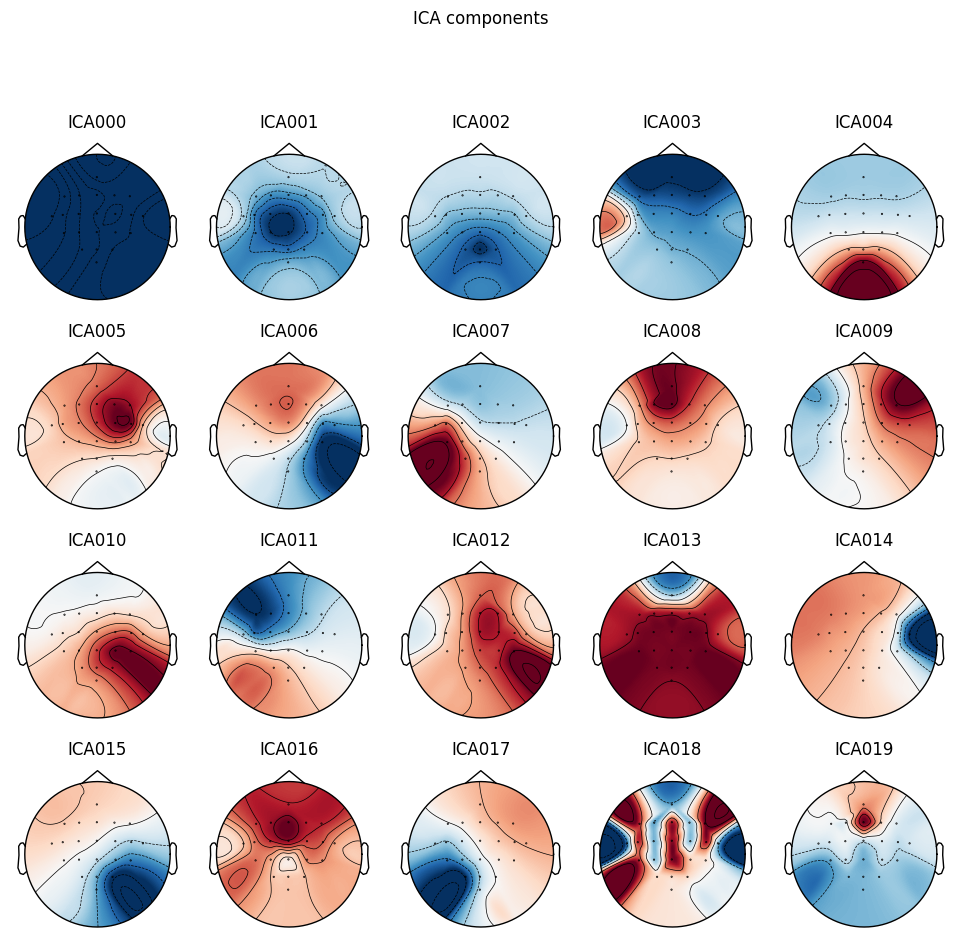

[<MNEFigure size 975x967 with 20 Axes>]

In [55]:
ica.plot_components()

In [56]:
eog_id, sco = ica.find_bads_ecg(raw, "Cz")
print(eog_id)

Using threshold: 0.44 for CTPS ECG detection
Using channel Cz to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 1280 samples (10.000 sec)

Number of ECG events detected : 1774 (average pulse 39 / min.)
Not setting metadata
1774 matching events found
No baseline correction applied
Using data from preloaded Raw for 1774 events and 129 original time points ...
0 bad epochs dropped
[]


In [57]:
eog_id, sco = ica.find_bads_eog(raw, "Cz")
print(eog_id)

Using EOG channel: Cz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 sec)

[0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [58]:
eog_id, sco = ica.find_bads_muscle(raw)
print(eog_id)

Effective window size : 2.000 (s)
[]


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1345 matching events found
No baseline correction appl

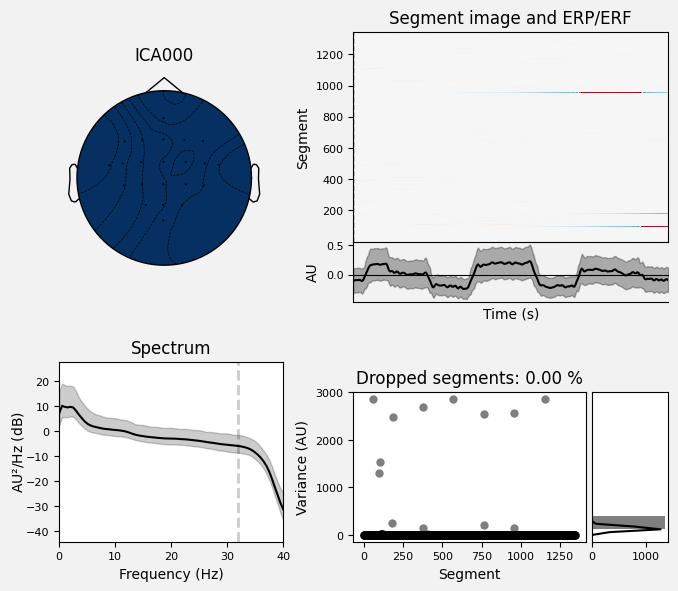

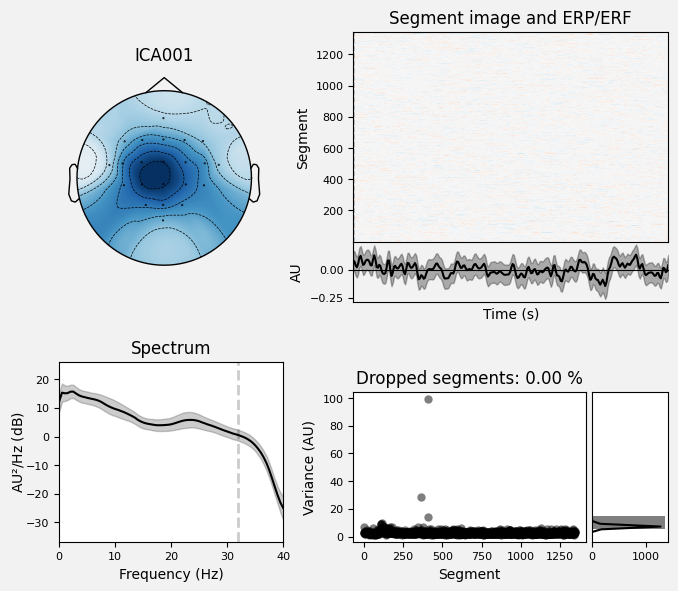

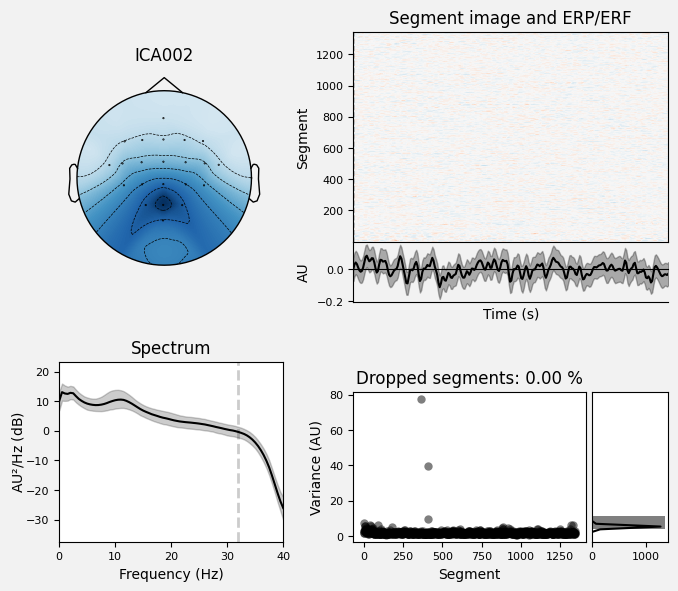

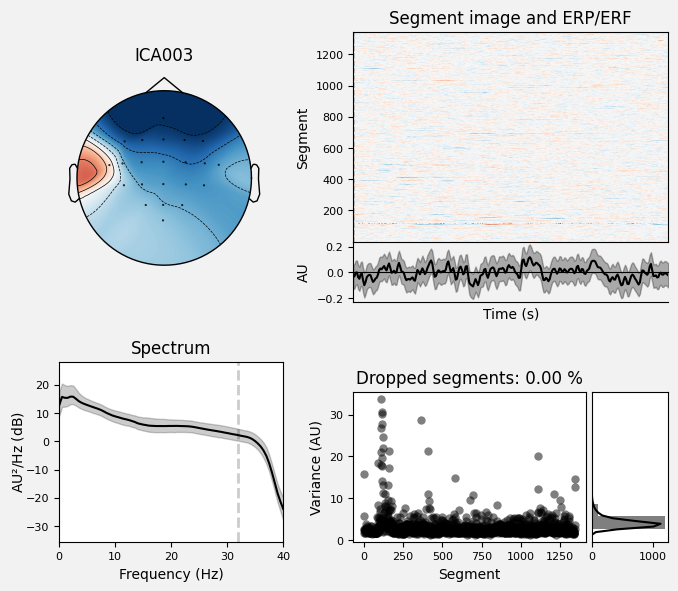

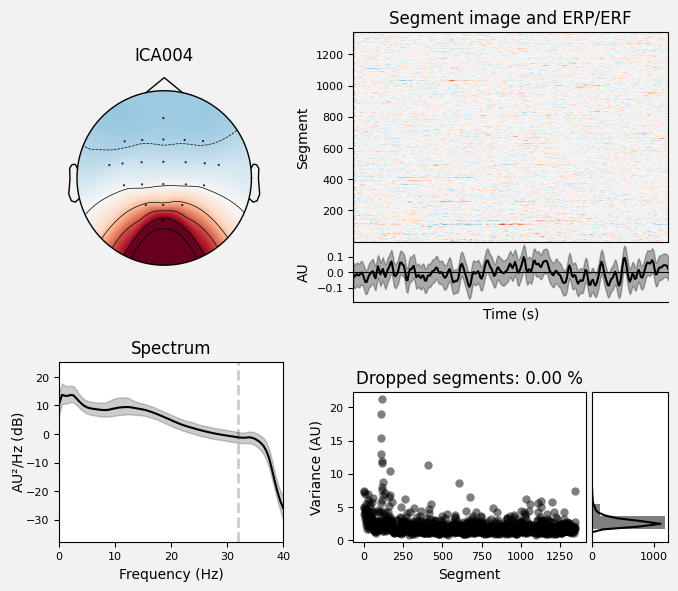

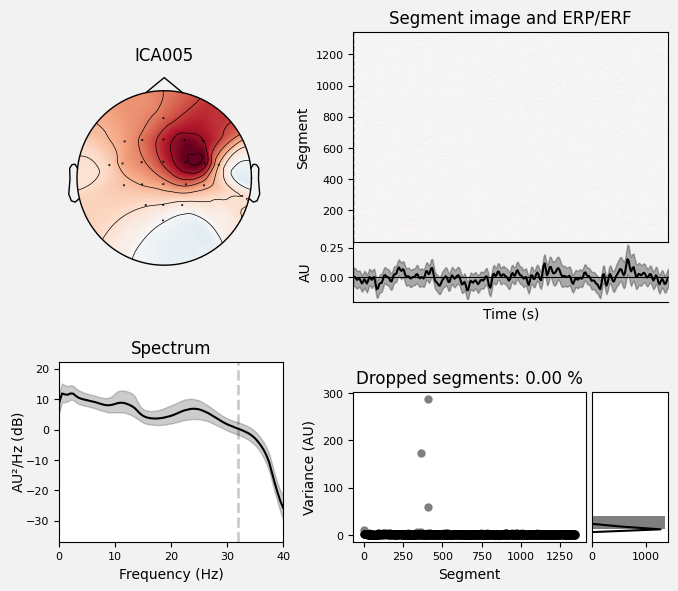

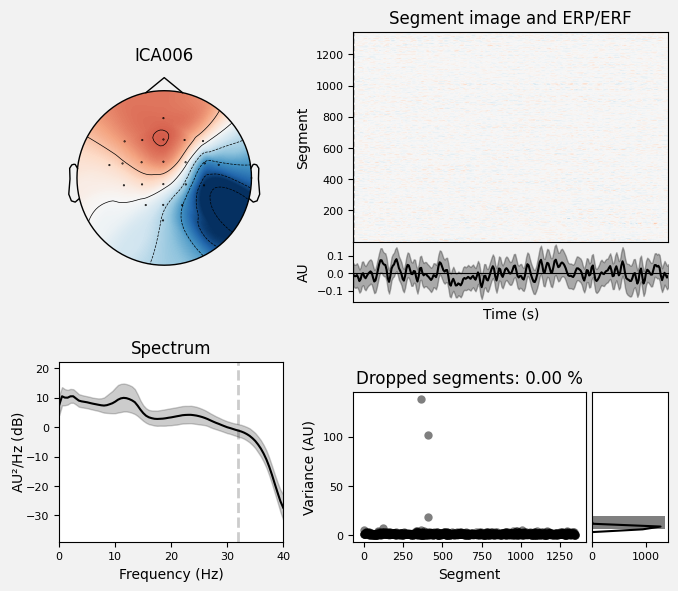

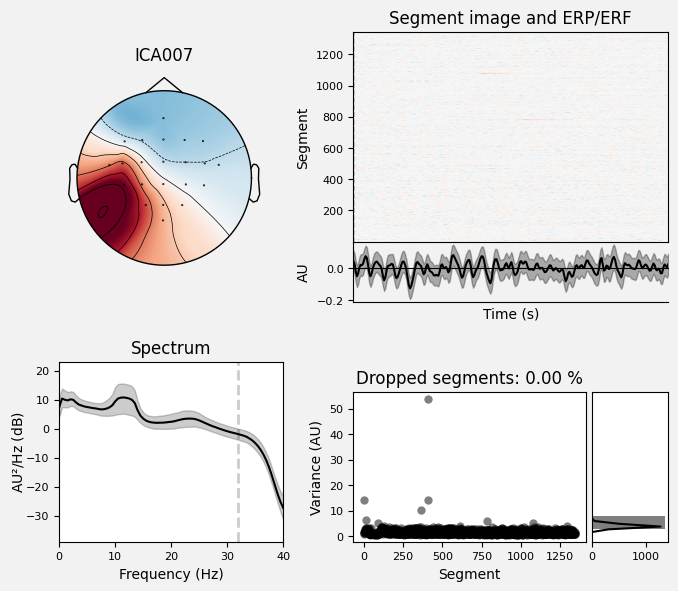

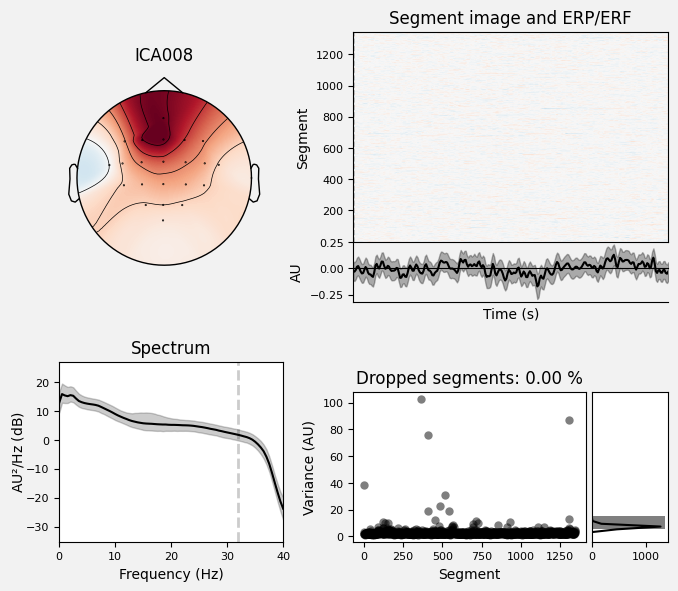

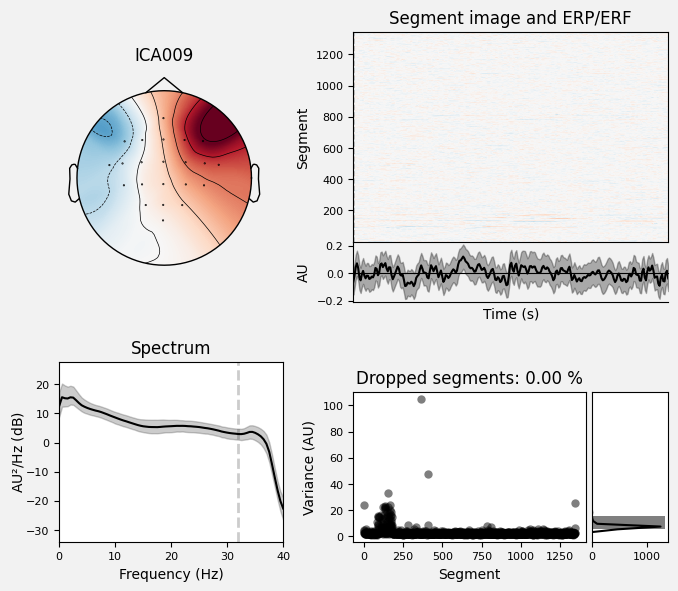

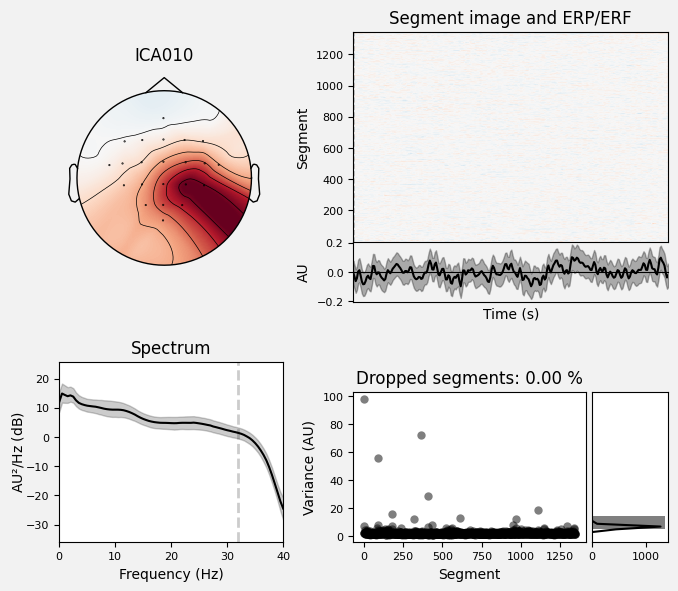

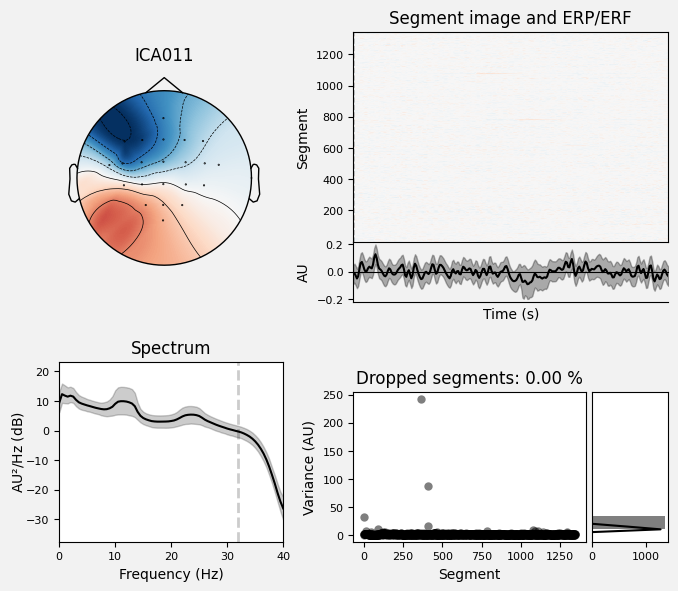

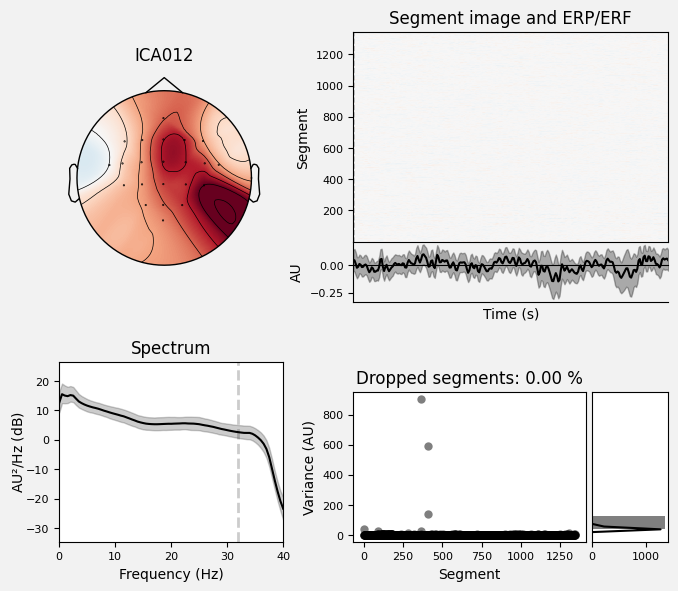

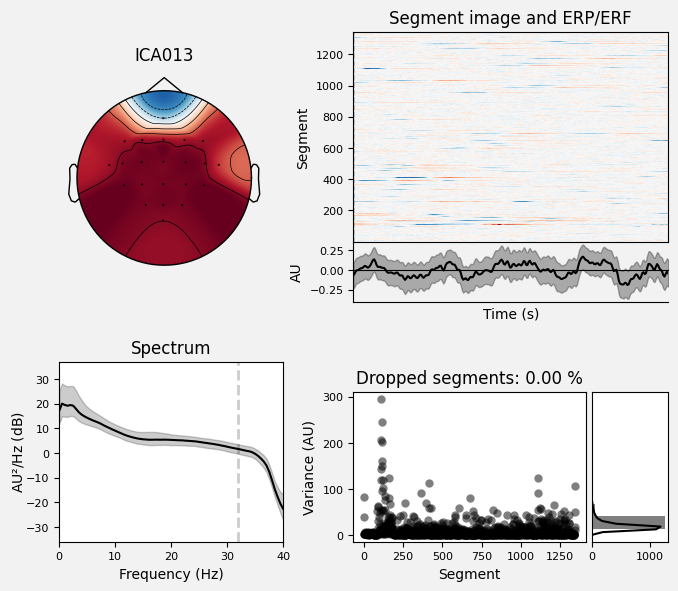

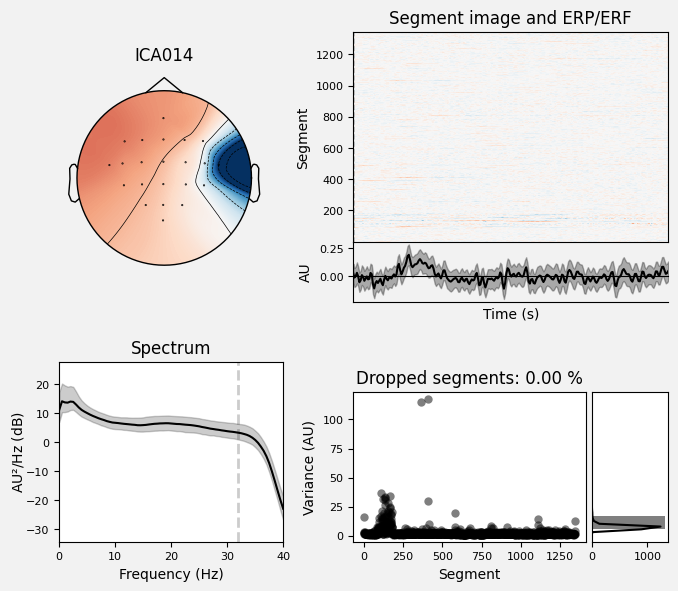

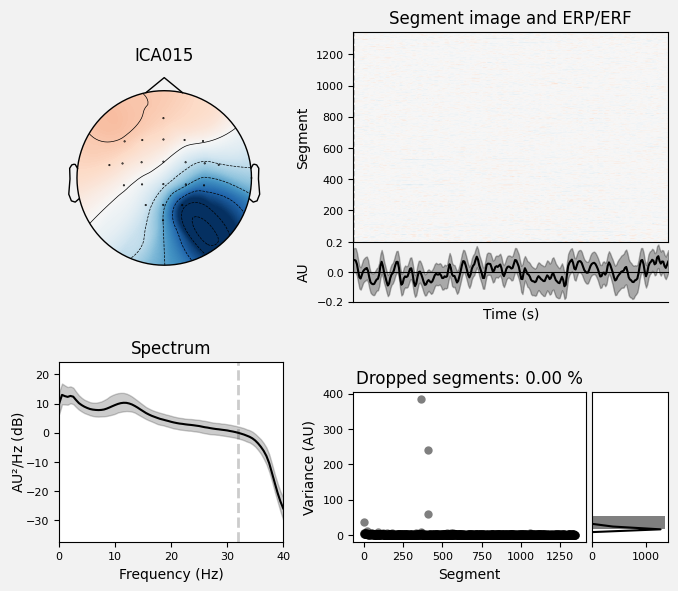

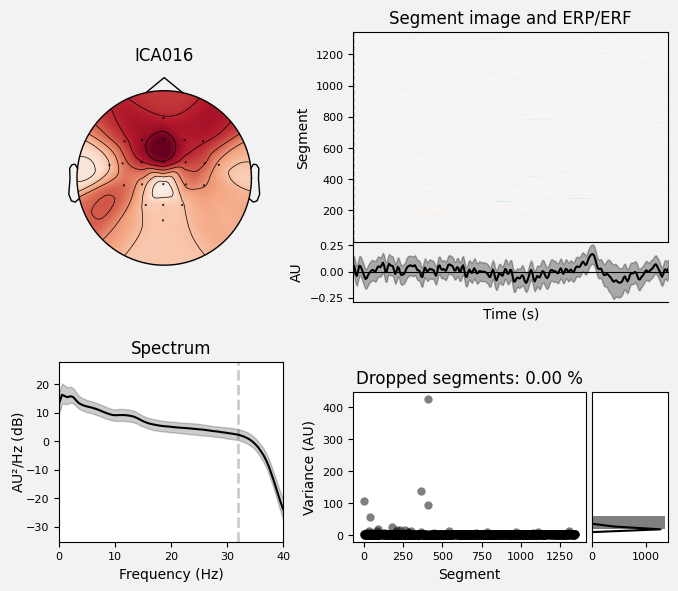

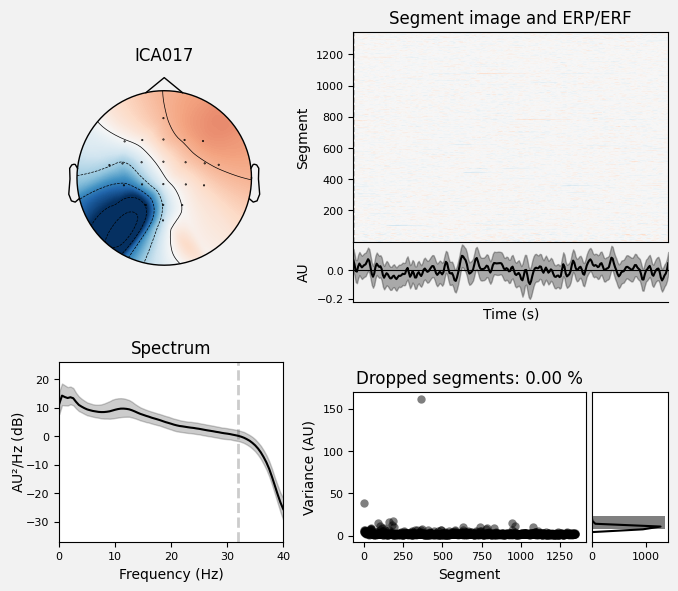

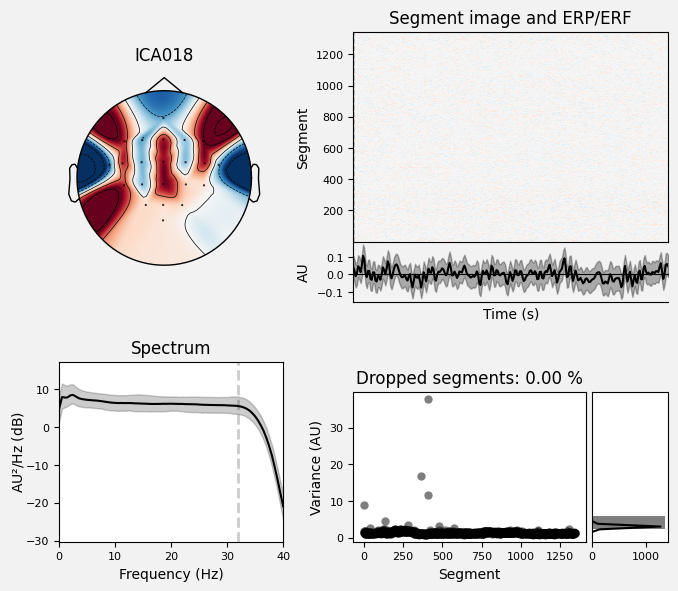

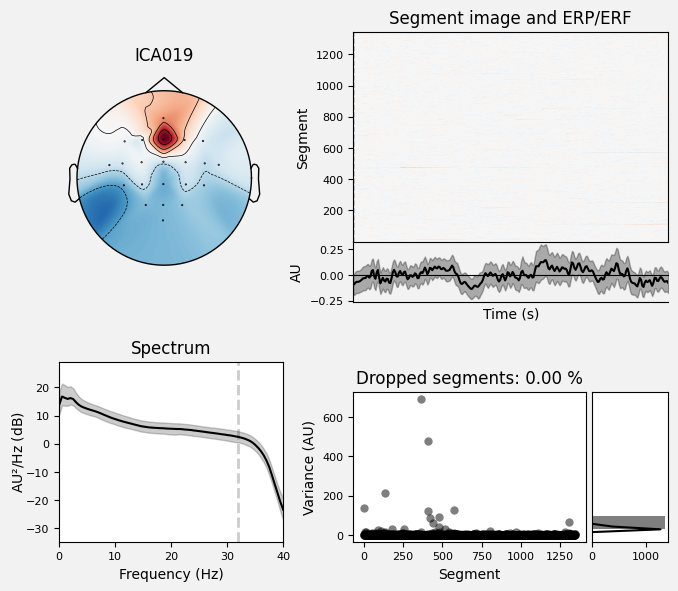

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [59]:
ica.plot_properties(raw, picks=list(range(20)))

## 创建events，数据分段，进行基线校正和平均

In [61]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [62]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 15198,      0,      5],
        ...,
        [343322,      0,      6],
        [343322,      0,      1],
        [343578,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [63]:
event_id = {
    "Hand/Left": 7,
    "Hand/Right": 8,    
    "Foot": 9,    
    "Tongue": 10,    
}
epochs = mne.Epochs(raw, events[0], event_id=event_id, preload=True)

Not setting metadata
288 matching events found
Setting baseline interval to [-0.203125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 91 original time points ...
0 bad epochs dropped


In [64]:
epochs

<Epochs |  288 events (all good), -0.203125 - 0.5 sec, baseline -0.203125 – 0 sec, ~4.4 MB, data loaded,
 'Hand/Left': 72
 'Hand/Right': 72
 'Foot': 72
 'Tongue': 72>

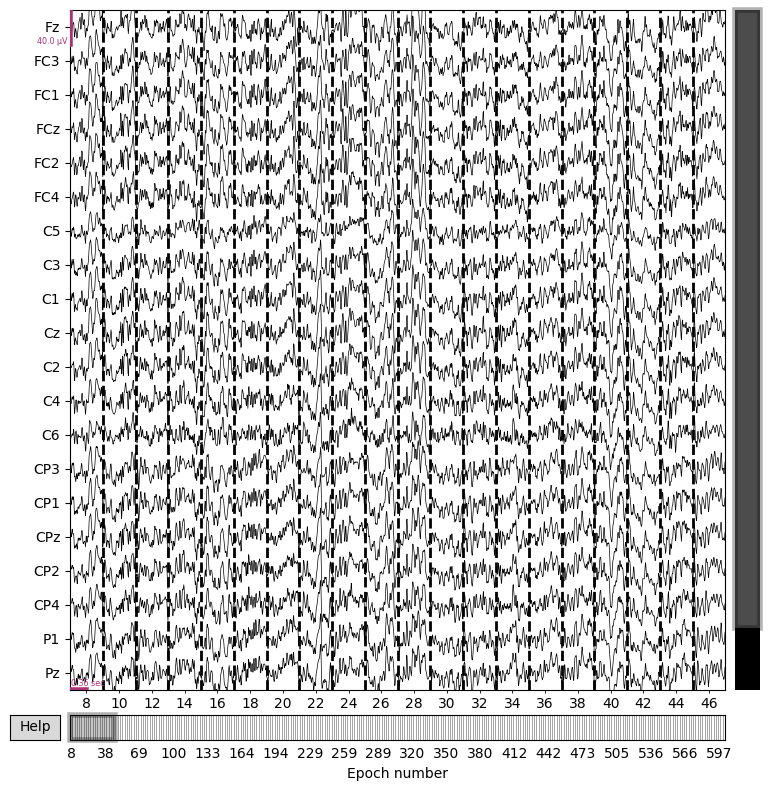

In [65]:
epochs.plot()
plt.show()

In [66]:
ica.exclude = [0, 3, 4, 13]
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 22 PCA components


C:\Users\mrrai\AppData\Local\Temp\ipykernel_57492\1699271478.py:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [67]:
epochs.apply_baseline()

Applying baseline correction (mode: mean)


<Epochs |  288 events (all good), -0.203125 - 0.5 sec, baseline -0.203125 – 0 sec, ~4.4 MB, data loaded,
 'Hand/Left': 72
 'Hand/Right': 72
 'Foot': 72
 'Tongue': 72>

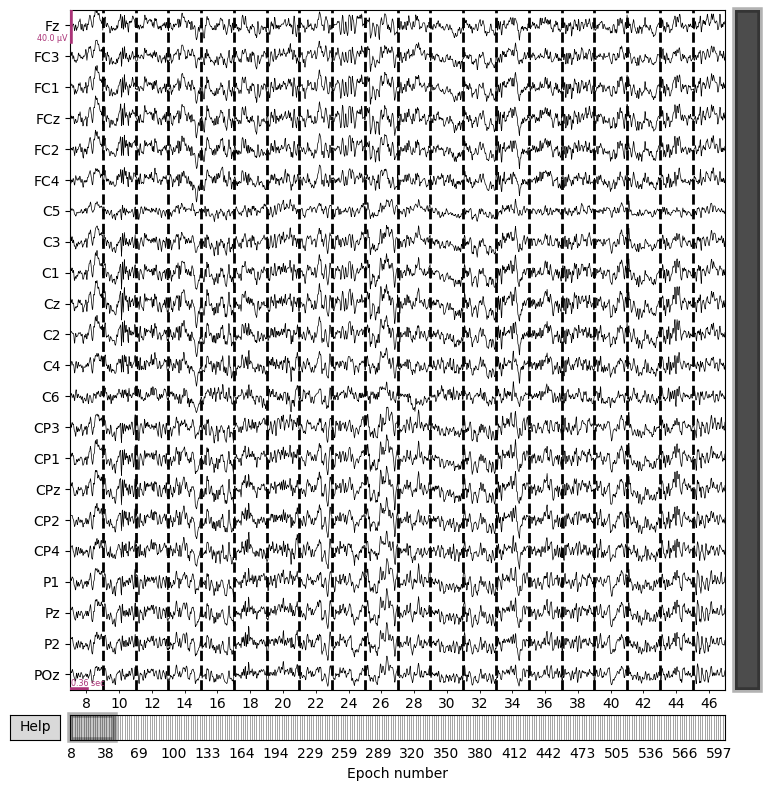

In [77]:
epochs.plot(n_channels=22)
plt.show()

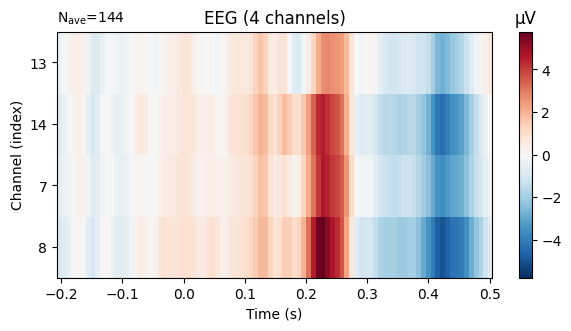

In [91]:
evk_hand = epochs["Hand"].average()
evk_hand.plot_image(["C1", "C3", "CP1", "CP3"])
plt.show()

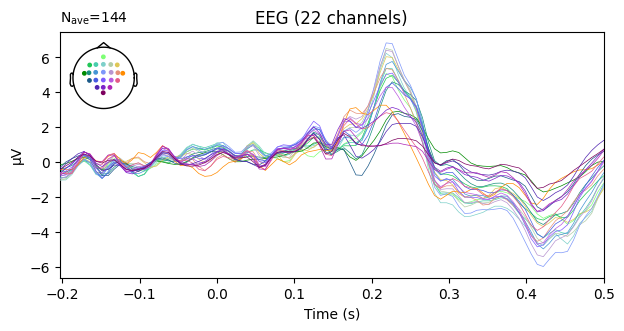

In [96]:
evk_hand.plot()
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.


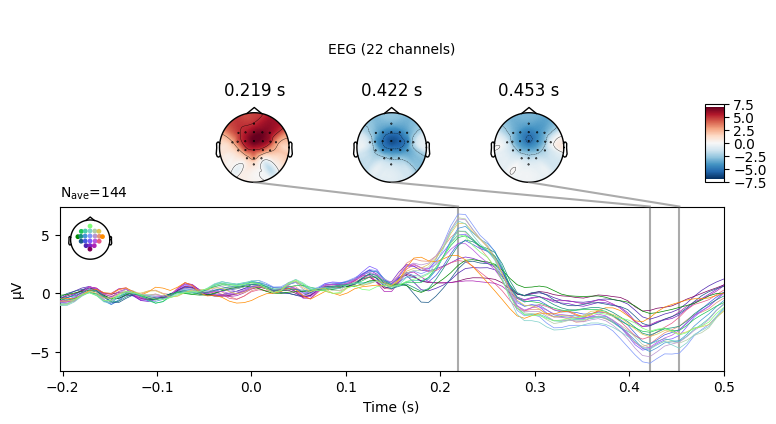

In [94]:
evk_hand.plot_joint()
plt.show()

In [98]:
epochs.save("A01T_0326_epo.fif")

In [ ]:
epochs.get_montage().